# **Laboratorio 7**

- Derek Arreaga - 22537
- Paula Barillas - 22764
- Mónica Salvatierra - 22249

Link del respositorio: https://github.com/FabianKel/ModSim-LAB7

## **Parte 2**

### **Teoría**

**1. Imagine que usted ha sido contratado para modelar el sistema de tráfico de una gran ciudad con el fin de evaluar el impacto de un nuevo sistema de metro. ¿Por qué un modelo puramente MBA, DES o DS sería, por sí solo, insuficiente para esta tarea? Describa cómo diseñaría usted un modelo híbrido para este problema, identificando qué componente del sistema sería modelado con cada paradigma y cómo interactuarían entre sí.**


En este caso el MBA modela la heterogeneidad y la toma de decisiones individual como por ejemplo preferencias, horarios, adaptación al tiempo de espera pero escalarlo a una ciudad entera y obtener medidas agregadas fiables consideramos que puede llegar a  ser muy costoso computacionalmente y complejo de calibrar; ahora si evaluamos a DES, podemos considerarlo que es ideal para procesos operativos y colas (embarque, control de acceso, capacidad de andenes) pero no modela fácilmente las decisiones adaptativas y la emergencia social que surge de millones de agentes individuales; y el SD es útil para estudiar retroalimentaciones y dinámicas agregadas a mediano-largo plazo (como puede ser cambios de demanda, uso del suelo, efectos de políticas) pero pierde detalle micro y variabilidad individual. Por eso creemos que es mejor un modelo híbrido en el que el nivel micro sea un MBA que represente a viajeros y vehículos con atributos individuales y reglas de decisión, por otro lado el nivel operativo sea un módulo DES que gestione recursos discretos (como los trenes, andenes, colas y procesos de embarque) y por último el nivel estratégico sea un modelo SD que capture variables agregadas y bucles de retroalimentación lentos (percepción del servicio, migración residencial, cambios de oferta). En donde la interacción sería que los agentes MBA generan demanda (llegadas a estaciones) que el DES procesa como entidades en colas y servicios; el DES devuelve indicadores operativos (tiempos de espera, tasas de rechazo) que modifican el comportamiento de los agentes; y el SD consume agregados (ridership diario, tiempo medio de viaje) para actualizar variables lentas y emitir políticas o ajustes (tarifas, inversión) que retroalimentan al MBA y al DES. Un ejemplo para entender mejor podría ser una pasajera decide usar o no el metro según su experiencia de espera (MBA ↔ DES) y, a largo plazo, mejores niveles de servicio pueden atraer vivienda cerca de estaciones, incrementando demanda (SD).


**2. En el 'Patrón 1: MBA → DES', la transición de un agente a una entidad debe ser fluida. Describa a nivel conceptual y técnico (¿qué información específica se debe transferir?) cómo se realizaría esta transición en una herramienta como AnyLogic, o de forma más abstracta, en un marco de trabajo en Python que combinara las bibliotecas Mesa (para MBA) y SimPy (para DES).**

Se entiende que la transición de agente a entidad debe incluir al menos un identificador único, el tipo de agente, el plan (como puede ser el origen, destino, hora estimada de llegada), los atributos operativos relevantes (por ejemplo tamaño del grupo, prioridad o movilidad reducida), el estado de la etapa del viaje y, para reproducibilidad, la semilla o estado aleatorio asociado. En AnyLogic esto se implementa de forma nativa convirtiendo un Agent en una 'entity' del Process Modeling Library (bloques enter/service), trasladando atributos con setters y manteniendo un mapeo entre el agent y la entity para devolver resultados operativos. En Python, una arquitectura práctica usa Mesa para la lógica de agentes y SimPy para las colas y recursos asi que cuando un agente Mesa llega a una estación, se crea y encola una entidad SimPy (representando un objeto ligero con sus atributos) en la cola del recurso. Ya que SimPy procesa la entidad y, al finalizar actualiza el objeto y notifica al agente por ejemplo, liberando un evento o actualizando una bandera compartida para que el agente actualice su plan. Técnicamente hay que acordar la unidad de tiempo y sincronizar relojes, para lograr mantener correspondencia ID↔objeto, asimismo compartir la semilla aleatoria para reproducibilidad, manejar entidades fallidas y diseñar la interfaz (contrato) entre módulos. Basicamente es como un pasajero (agente) deja su 'ticket' en la cola (entidad), el módulo DES decide si sube o no y devuelve el tiempo de espera que el agente usa para replanificar o elegir otro modo.

**3. El 'Patrón 3: DS dentro de un Agente' es un claro ejemplo de modelado multi-escala. Proponga usted otro escenario (fuera del ámbito biológico), por ejemplo, en economía o sociología, donde este patrón sería de gran utilidad. ¿Qué representaría el agente (MBA) y qué dinámica capturaría su modelo de Dinámica de Sistemas (DS) interno?**

Consideramos que un escenario claro es una red de tiendas minoristas en la que cada tienda es un agente del MBA y dentro de cada agente existe un pequeño modelo SD que describe variables continuas como inventario, caja y flujos de reabastecimiento con retrasos. En este caso el MBA captura clientes heterogéneos que se desplazan entre tiendas, ya que responden a promociones y generan demanda local; el DS interno modela los stocks de inventario, los flujos de ventas y los retrasos de reposición que, a su vez, condicionan decisiones de precios o promociones dentro de la tienda. Este patrón permite capturar emergencias como por ejemplo, una promoción en la tienda "la bendición" reduce el inventario (dinámica interna) y provoca que clientes se desplacen a la tienda "el chino" provocando efecto emergente del MBA en la red, en donde el comportamiento no sería visible si las tiendas fueran representadas sólo por ecuaciones agregadas o por simples agentes sin dinámica interna.

**4. La combinación de paradigmas de modelado presenta desafíos significativos. Desde su perspectiva, ¿cuáles cree usted que son los dos mayores desafíos al construir y validar un modelo híbrido? Considere aspectos como la calibración de parámetros entre los diferentes componentes, la complejidad del software y la validación de los resultados emergentes.**

Consideramos que la combinación de paradigmas conlleva varios retos siendo dos de los más críticos eñ primero sería la calibración y coherencia entre componentes heterogéneos y segundo la complejidad computacional y la atribución de causación en comportamientos emergentes. Ya que la calibración es difícil porque parámetros que viven en escalas distintas por ejemplo, tiempos medios de espera del DES, elasticidades de demanda en SD y reglas individuales en el MBA deben armonizarse; ya que una mitigación práctica es calibrar submódulos de forma independiente con datos específicos y luego realizar una calibración conjunta usando métodos aproximados por ejemplo ABC o protocolos tipo CaliPro, junto con análisis de sensibilidad e identificación de parámetros no identificables y una documentación explícita de los contratos de datos entre módulos. En el caso del coste computacional y la sincronización se atacan con co-simulación por pasos temporales bien definidos, haciendo uso de modelos surrogate o aproximados para la exploración y paralelización, y validación por capas, ya que  primero validaría submodelos con datos observables y luego validaria emergentes concretos un ejemplo puede ser la distribución horaria de viajes. En el caso de la práctica se debe además cuantificar incertidumbre mediante escenarios y comparar salidas del modelo con métricas observables como conteos de pasajeros, tiempos GPS, encuestas para detectar discrepancias que apunten a problemas en las interfaces.



### **Práctica**

**Importación de librerías**

In [ ]:
import simpy
import numpy as np
import random
from dataclasses import dataclass, field
import math
import pandas as pd

# Reproducibilidad
SEED = 16
random.seed(SEED)
np.random.seed(SEED)

In [19]:
# Mundo
NUM_AGENTES = 60
ANCHO_MUNDO = 100.0
ALTO_MUNDO  = 100.0

# Dinámica de stocks (DS)
ENERGIA_MAX = 10.0
ENERGIA_INICIAL = 10.0
TASA_RECUPERACION_NATURAL = 0.02 
DECAY_BASE = 0.015        
GASTO_POR_MOVIMIENTO = 0.015          # costo por unidad de distancia recorrida
EFECTO_INTERACCION = 0.10             # magnitud base (+/-) por interacción cercana
RADIO_INTERACCION = 8.0               # distancia para considerar "vecino"

# Evento discreto (DES)
NUM_PUESTOS_RECARGA = 5               
ENERGIA_CRITICA = 2.0
TIEMPO_RECARGA = 10.0                 # tiempo de servicio en estación

# Simulación
TIEMPO_SIMULACION = 400.0
DT = 1.0                               # paso de integración tipo Euler
VEL_MIN, VEL_MAX = 0.8, 2.0            # módulo de velocidad (dirección aleatoria)


In [20]:
@dataclass
class Metrics:
    t: list = field(default_factory=list)
    energia_prom: list = field(default_factory=list)
    num_bajo_critico: list = field(default_factory=list)
    en_cola: list = field(default_factory=list)
    en_servicio: list = field(default_factory=list)
    utilizacion: list = field(default_factory=list)
    usos_estacion: int = 0
    tiempos_espera: list = field(default_factory=list)  # por sesión de recarga


In [ ]:
class Agente:
    def __init__(self, agent_id, env, estacion_recarga, posicion_inicial):
        self.id = agent_id
        self.env = env
        self.estacion_recarga = estacion_recarga

        # MBA
        self.pos = np.array(posicion_inicial, dtype=float)
        ang = np.random.uniform(0, 2*np.pi)
        speed = np.random.uniform(VEL_MIN, VEL_MAX)
        self.vel = np.array([math.cos(ang)*speed, math.sin(ang)*speed], dtype=float)

        # DS
        self.energia = ENERGIA_INICIAL

        # Flags DES
        self.recargando = False
        self.en_cola = False

        # Para medir esperas individuales
        self._t_solicitud = None

    def proceso_recarga(self, metrics: Metrics):
        self.en_cola = True
        self._t_solicitud = self.env.now

        with self.estacion_recarga.request() as req:
            # Espera turno
            yield req
            self.en_cola = False
            self.recargando = True
            # Medimos tiempo de espera
            if self._t_solicitud is not None:
                metrics.tiempos_espera.append(self.env.now - self._t_solicitud)
                self._t_solicitud = None

            # Se registra el uso
            metrics.usos_estacion += 1

            # Servicio
            yield self.env.timeout(TIEMPO_RECARGA)

            # Al terminar servicio, restaura energía
            self.energia = ENERGIA_MAX
            self.recargando = False

    def _rebote_bordes(self):
        # Rebote en X
        if self.pos[0] <= 0.0 and self.vel[0] < 0:
            self.vel[0] *= -1
            self.pos[0] = 0.0
        elif self.pos[0] >= ANCHO_MUNDO and self.vel[0] > 0:
            self.vel[0] *= -1
            self.pos[0] = ANCHO_MUNDO

        # Rebote en Y
        if self.pos[1] <= 0.0 and self.vel[1] < 0:
            self.vel[1] *= -1
            self.pos[1] = 0.0
        elif self.pos[1] >= ALTO_MUNDO and self.vel[1] > 0:
            self.vel[1] *= -1
            self.pos[1] = ALTO_MUNDO

    def actualizar_estado(self, efecto_interaccion_neto):
        # Si está recargando, no hace nada en este paso
        if self.recargando:
            return

        if self.en_cola:
            # En cola: no se mueve, no recupera
            dE_dt = -DECAY_BASE + efecto_interaccion_neto
            self.energia += dE_dt * DT
        else:
            # MBA: mover
            self.pos += self.vel * DT
            self._rebote_bordes()

            # Costo por movimiento (proporcional al módulo de la velocidad)
            costo_mov = GASTO_POR_MOVIMIENTO * np.linalg.norm(self.vel)

            # DS: inflow - outflow, más interacciones y drenaje 
            dE_dt = (TASA_RECUPERACION_NATURAL) - DECAY_BASE - (costo_mov) + (efecto_interaccion_neto)
            self.energia += dE_dt * DT

        # Limitar energía [0, ENERGIA_MAX]
        self.energia = max(0.0, min(ENERGIA_MAX, self.energia))

        # Disparar proceso de recarga
        if (self.energia < ENERGIA_CRITICA) and (not self.recargando) and (not self.en_cola):
            self.env.process(self.proceso_recarga(self.metrics_ref))

In [ ]:
def calcular_interacciones(agentes):
    n = len(agentes)
    efectos = np.zeros(n, dtype=float)

    for i in range(n):
        for j in range(i+1, n):
            if agentes[i].recargando or agentes[j].recargando:
                continue
            d = np.linalg.norm(agentes[i].pos - agentes[j].pos)
            if d < RADIO_INTERACCION:
                # 60% ambas negativas (cansancio), 40% ambas positivas (sinergia)
                signo = -1 if random.random() < 0.6 else 1
                aten = max(0.25, 1.0 - (d / RADIO_INTERACCION))
                delta = signo * EFECTO_INTERACCION * aten
                efectos[i] += delta
                efectos[j] += delta
    return efectos

def ejecutar_simulacion(capacidad_estacion=NUM_PUESTOS_RECARGA,
                        tiempo=TIEMPO_SIMULACION, dt=DT):
    env = simpy.Environment()
    estacion = simpy.Resource(env, capacity=capacidad_estacion)
    metrics = Metrics()

    # Crear agentes
    agentes = []
    for k in range(NUM_AGENTES):
        pos0 = (np.random.uniform(0, ANCHO_MUNDO), np.random.uniform(0, ALTO_MUNDO))
        a = Agente(k, env, estacion, pos0)
        a.metrics_ref = metrics  
        agentes.append(a)

    def loop():
        while env.now < tiempo:
            # Interacciones
            efectos = calcular_interacciones(agentes)

            # Actualizar agentes
            for idx, ag in enumerate(agentes):
                ag.actualizar_estado(efectos[idx])

            # Recolección de métricas de sistema
            energia_prom = np.mean([ag.energia for ag in agentes])
            bajo_critico = sum(1 for ag in agentes if ag.energia < ENERGIA_CRITICA)
            en_servicio = estacion.count          # cuántos están siendo atendidos
            en_cola = len(estacion.queue)         # cuántos esperan
            util = en_servicio / capacidad_estacion if capacidad_estacion > 0 else 0.0

            metrics.t.append(env.now)
            metrics.energia_prom.append(float(energia_prom))
            metrics.num_bajo_critico.append(int(bajo_critico))
            metrics.en_servicio.append(int(en_servicio))
            metrics.en_cola.append(int(en_cola))
            metrics.utilizacion.append(float(util))

            # Avance del tiempo
            yield env.timeout(dt)

    env.process(loop())
    env.run()

    # Agregados útiles
    resumen = {
        "capacidad": capacidad_estacion,
        "tiempo_total": tiempo,
        "usos_estacion": metrics.usos_estacion,
        "energia_promedio_global": float(np.mean(metrics.energia_prom)),
        "cola_promedio": float(np.mean(metrics.en_cola)),
        "utilizacion_promedio": float(np.mean(metrics.utilizacion)),
        "espera_promedio": float(np.mean(metrics.tiempos_espera)) if metrics.tiempos_espera else 0.0,
        "porcentaje_tiempo_con_cola": float(np.mean([1.0 if c>0 else 0.0 for c in metrics.en_cola]))*100.0,
        "porcentaje_bajo_critico_promedio": float(np.mean(np.array(metrics.num_bajo_critico)/NUM_AGENTES))*100.0
    }

    return agentes, metrics, resumen


In [23]:
agentes_A, metrics_A, resumen_A = ejecutar_simulacion(capacidad_estacion=5)
resumen_A


{'capacidad': 5,
 'tiempo_total': 400.0,
 'usos_estacion': 44,
 'energia_promedio_global': 6.456017792794378,
 'cola_promedio': 0.035,
 'utilizacion_promedio': 0.1935,
 'espera_promedio': 0.3181818181818182,
 'porcentaje_tiempo_con_cola': 2.25,
 'porcentaje_bajo_critico_promedio': 1.808333333333333}

In [24]:
agentes_B, metrics_B, resumen_B = ejecutar_simulacion(capacidad_estacion=1)
resumen_B


{'capacidad': 1,
 'tiempo_total': 400.0,
 'usos_estacion': 47,
 'energia_promedio_global': 5.721439865384318,
 'cola_promedio': 6.9125,
 'utilizacion_promedio': 0.42,
 'espera_promedio': 141.63829787234042,
 'porcentaje_tiempo_con_cola': 46.0,
 'porcentaje_bajo_critico_promedio': 12.216666666666665}

Text(0.5, 1.0, 'Utilización del recurso vs tiempo')

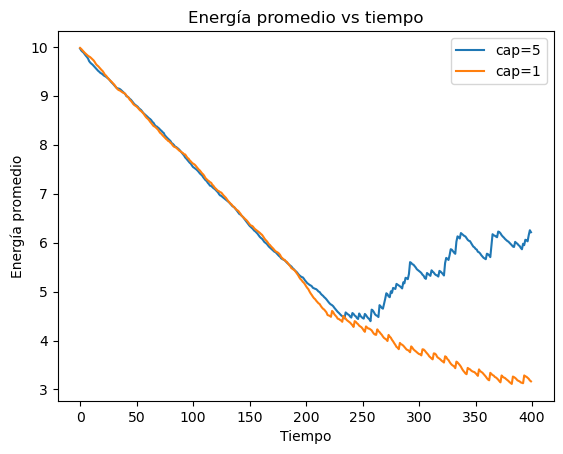

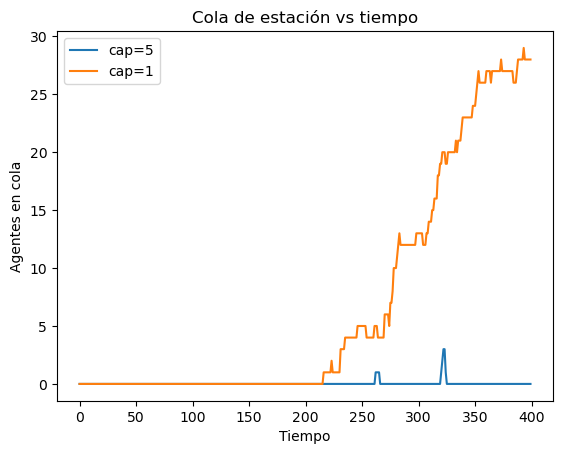

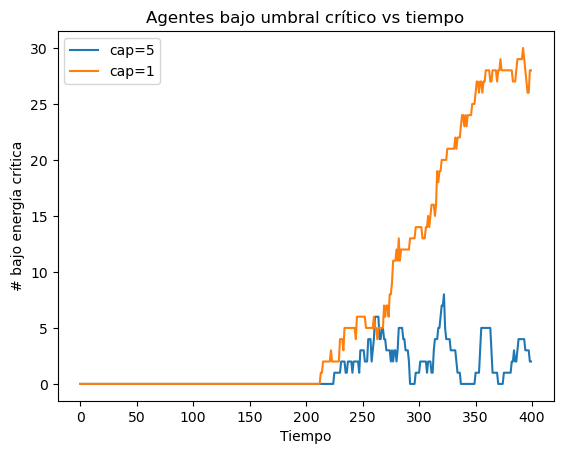

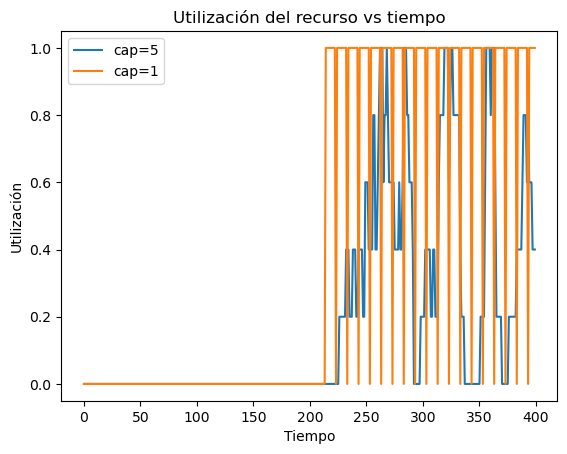

In [25]:
import matplotlib.pyplot as plt

# Energía promedio
plt.figure()
plt.plot(metrics_A.t, metrics_A.energia_prom, label="cap=5")
plt.plot(metrics_B.t, metrics_B.energia_prom, label="cap=1")
plt.xlabel("Tiempo")
plt.ylabel("Energía promedio")
plt.legend()
plt.title("Energía promedio vs tiempo")

# Tamaño de cola
plt.figure()
plt.plot(metrics_A.t, metrics_A.en_cola, label="cap=5")
plt.plot(metrics_B.t, metrics_B.en_cola, label="cap=1")
plt.xlabel("Tiempo")
plt.ylabel("Agentes en cola")
plt.legend()
plt.title("Cola de estación vs tiempo")

# Agentes bajo crítico
plt.figure()
plt.plot(metrics_A.t, metrics_A.num_bajo_critico, label="cap=5")
plt.plot(metrics_B.t, metrics_B.num_bajo_critico, label="cap=1")
plt.xlabel("Tiempo")
plt.ylabel("# bajo energía crítica")
plt.legend()
plt.title("Agentes bajo umbral crítico vs tiempo")

# Utilización de la estación
plt.figure()
plt.plot(metrics_A.t, metrics_A.utilizacion, label="cap=5")
plt.plot(metrics_B.t, metrics_B.utilizacion, label="cap=1")
plt.xlabel("Tiempo")
plt.ylabel("Utilización")
plt.legend()
plt.title("Utilización del recurso vs tiempo")


In [ ]:


df_res = pd.DataFrame([resumen_A, resumen_B])
df_res


,capacidad,tiempo_total,usos_estacion,energia_promedio_global,cola_promedio,utilizacion_promedio,espera_promedio,porcentaje_tiempo_con_cola,porcentaje_bajo_critico_promedio
0,5,400.0,44,6.456018,0.0350,0.1935,0.318182,2.25,1.808333
1,1,400.0,47,5.721440,6.9125,0.4200,141.638298,46.00,12.216667


### **Preguntas de Análisis**

**1. Ejecute la simulación con una capacidad generosa en la estación de recarga (NUM_PUESTOS_RECARGA = 5). ¿Cuántos agentes, en promedio, utilizan la estación durante la simulación? Analice los datos que recolectó. ¿Se forman colas significativas o el servicio es fluido?**

- Con cinco puestos se registraron 44 usos totales en 400 unidades de tiempo, con utilización promedio ≈ 0.19. La cola promedio fue 0.035 agentes y solo hubo cola en 2.25 % del tiempo; además, el tiempo de espera promedio fue ~0.32. En la práctica, el servicio es fluido, la estación absorbe la demanda y los episodios de espera son cortos y esporádicos. La energía promedio global ≈ 6.46 muestra que, tras la caída inicial, la población logra estabilizarse gracias a recargas oportunas.

**2. Ahora, reduzca drásticamente la capacidad de la estación a NUM_PUESTOS_RECARGA = 1. ¿Cómo impacta este cambio en la dinámica general de energía de la población? ¿Observa usted un mayor número de agentes con energía críticamente baja durante periodos más prolongados? ¿Por qué ocurre esto?**

- Con un solo puesto aparecieron 47 usos, pero la cola promedio subió a 6.91 agentes, con cola presente 46 % del tiempo y esperas promedio ~141.64. La energía promedio global cayó a ≈ 5.72 y el porcentaje de agentes bajo el umbral crítico aumentó de 1.8 % a 12.2 %. Ocurre porque la estación se satura, por lo que se alargan las esperas, los agentes permanecen más tiempo con energía baja, se mueven e interactúan menos, y la reposición se retrasa, lo que deprime el nivel energético agregado.

**3. En el escenario con NUM_PUESTOS_RECARGA = 1, la estación de recarga se convierte en un claro cuello de botella (un fenómeno DES). ¿Qué efecto observable tiene este cuello de botella sobre el comportamiento agregado del sistema (por ejemplo, el nivel de energía promedio de toda la población a lo largo del tiempo, un resultado del MBA+DS)?**

- El cuello de botella se refleja en tres cuestiones principales: la energía promedio baja y ya no logra recuperarse, las colas en la estación se vuelven largas y frecuentes, y la estación está ocupada casi todo el tiempo. Cuando solo hay un puesto de recarga (cap=1), la curva de energía no logra subir otra vez como cuando hay cinco puestos; más bien se mantiene por debajo y termina estabilizándose en un nivel más bajo. Esto muestra que la limitación del recurso afecta directamente el “bienestar energético” de los agentes, ya que muchos no pueden recargar a tiempo y el sistema completo pierde estabilidad.

**4. Basándose en sus experimentos, describa el bucle de retroalimentación que existe entre el componente DES (la disponibilidad de la estación de recarga) y el componente MBA+DS (la energía y el comportamiento de la población de agentes). ¿De qué manera demuestra este ejercicio la afirmación de que en el modelado híbrido, "el todo es más que la suma de sus partes"?**

- Cuando la estación tiene suficiente capacidad, los agentes que se quedan sin energía pueden recargar rápido, recuperar su nivel normal y volver a moverse e interactuar con los demás. Eso mantiene la energía promedio alta y evita que se acumulen muchos en la cola. En cambio, cuando la capacidad baja, las colas se hacen largas, los agentes pasan más tiempo con energía baja, se mueven menos y tienen menos interacciones positivas. Esto hace que más agentes necesiten recargar y el problema se vuelva aún más grande. Esa conexión entre la energía, el movimiento y la disponibilidad del servicio hace que aparezcan comportamientos nuevos, como la congestión o la caída general de energía, que no se pueden explicar por separado. En otras palabras, el sistema completo se comporta de una forma que va más allá de la suma de sus partes.



## **Prompt Utilizado**

Hola, podrías ayudarme a plantear el esqueleto básico de una simulación híbrida en Python que combine los tres paradigmas de modelación: dinámicas de sistemas (DS), multi-agentes (MBA) y eventos discretos (DES). Estoy trabajando en un laboratorio de Modelación y Simulación y necesito una guía para estructurar el código desde cero, pero sin que me des la implementación completa. Solo quiero entender cómo organizar las clases, procesos y funciones principales.

La idea es que cada agente tenga un nivel interno de energía (componente DS) que cambie con el tiempo, un movimiento en un espacio bidimensional con interacciones con otros agentes cercanos (componente MBA), y que cuando su energía baje de cierto umbral crítico, el agente deba acudir a una estación de recarga con recursos limitados (componente DES). 


#### **Por qué funcionó este prompt**

Este prompt funcionó porque fue claro y enfocado en la estructura, no en el resultado final. Permitió entender cómo se debía organizar la simulación híbrida desde un punto de vista conceptual, separando las tres partes del modelo y entendiendo cómo se comunican entre sí dentro del entorno de simpy. En lugar de pedir el código completo, pedí una orientación paso a paso para definir las clases, los procesos y las funciones necesarias.

La guía que recibí me sirvió para visualizar mejor cómo integrar los tres paradigmas, el DS como el componente que controla la energía de cada agente, el MBA para representar su movimiento y las interacciones en el espacio, y el DES como la parte encargada de la estación de recarga y la cola de espera. Esa explicación me ayudó a diseñar el flujo principal de la simulación, a definir qué variables globales eran importantes, y a establecer la secuencia lógica de acciones dentro de cada ciclo de tiempo.

## **Referencias**

1. Achachlouei, M. A., & Hilty, L. (2015). System Dynamics vs. agent-based modeling—comparing models and approaches : A literature review and a transformation procedure. https://www.diva-portal.org/smash/get/diva2:844069/FULLTEXT01.pdf

2. Bastarianto, F. F., Hancock, T. O., Choudhury, C. F., & Manley, E. (2023). Agent-based models in urban transportation: review, challenges, and opportunities. European Transport Research Review, 15(1). https://doi.org/10.1186/s12544-023-00590-5

3. Nanda, P., & Kirschner, D. E. (2023). Calibration methods to fit parameters within complex biological models. Frontiers in Applied Mathematics and Statistics, 9. https://doi.org/10.3389/fams.2023.1256443